In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
from scipy.stats import chisquare



In [61]:
musicframe = pd.read_csv('april2019.csv', sep=',')

In [62]:
musicframe.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,1.306630e+05,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,2.126331e+05,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,1.231551e+05,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,3.203000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,1.639225e+05,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,2.019010e+05,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,2.410475e+05,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


In [63]:
musicframe_orig = pd.read_csv('april2019.csv', sep=',')

In [64]:
musicframe_orig[musicframe_orig['loudness']>0]

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
1830,Diplo,0UBafqn0HVWRceDnOv2SZu,Welcome to the Party,0.11400,0.618,181720,0.845,0.000000,2,0.4150,0.175,1,0.1320,171.921,4,0.486,63
8361,Duki,5DQGkXXLiOhf5cKqIyWh5L,Rockstar,0.09060,0.878,112273,0.855,0.000000,9,0.1740,0.642,1,0.0940,123.991,4,0.330,68
8614,Borgore,6snTBYueohABGZe6rvcoY4,Reasons,0.06080,0.640,180874,0.972,0.000298,1,0.0965,0.038,1,0.2300,149.987,4,0.690,37
14858,SVDDEN DEATH,6loRVLAxkTpMWRbT7Pt5se,Angel Style,0.02300,0.625,244966,0.958,0.002000,2,0.3290,0.034,1,0.4080,145.071,4,0.610,44
19357,CG5,0EILQz6dagmiqJZSVOzFVc,No More Cake,0.10900,0.778,190488,0.978,0.000000,6,0.2440,0.476,1,0.2680,111.995,4,0.711,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119184,Steve Aoki,1euVAbcwOwn6N7z11ZWzXX,Waste It On Me (feat. BTS) - Slushii Remix,0.26000,0.694,188235,0.896,0.000000,7,0.0937,0.126,1,0.0742,102.011,4,0.491,56
120843,Diplo,5mqzhMuUpvnMfwNz6iepmO,Welcome to the Party (with French Montana & Li...,0.11400,0.618,181720,0.845,0.000000,2,0.4150,0.175,1,0.1320,171.921,4,0.486,74
125789,Diplo,0UBafqn0HVWRceDnOv2SZu,Welcome to the Party (feat. Lil Pump),0.11400,0.618,181720,0.845,0.000000,2,0.4150,0.175,1,0.1320,171.921,4,0.486,63
126898,Steve Aoki,1euVAbcwOwn6N7z11ZWzXX,Waste It On Me - Slushii Remix,0.26000,0.694,188235,0.896,0.000000,7,0.0937,0.126,1,0.0742,102.011,4,0.491,56


In [65]:
print(musicframe.keys())

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')


In [66]:
musicframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130663 entries, 0 to 130662
Data columns (total 17 columns):
artist_name         130663 non-null object
track_id            130663 non-null object
track_name          130663 non-null object
acousticness        130663 non-null float64
danceability        130663 non-null float64
duration_ms         130663 non-null int64
energy              130663 non-null float64
instrumentalness    130663 non-null float64
key                 130663 non-null int64
liveness            130663 non-null float64
loudness            130663 non-null float64
mode                130663 non-null int64
speechiness         130663 non-null float64
tempo               130663 non-null float64
time_signature      130663 non-null int64
valence             130663 non-null float64
popularity          130663 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 16.9+ MB


In [67]:
popular = musicframe[musicframe['popularity'] > 60]

In [68]:
popular

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
60,Lecrae,1FYd1szE0RHXOAM00V4MEx,Coming In Hot,0.0271,0.890,200168,0.454,0.000004,8,0.1570,-8.777,1,0.2600,140.041,4,0.425,70
290,Zé Neto & Cristiano,1fyhyOy6iS9E2NckAzjmTo,Status Que Eu Não Queria - Ao Vivo,0.5900,0.580,153934,0.871,0.000000,4,0.5640,-4.052,1,0.2090,117.622,4,0.911,74
618,Juan Magán,0fl1Y7GXXbcLuj2mBPtG26,Escondidos,0.0753,0.583,202713,0.801,0.000000,1,0.1110,-3.167,1,0.0904,191.965,4,0.484,63
621,Drake,3mvYQKm8h6M5K5h0nVPY9S,After Dark (feat. Static Major &amp; Ty Dolla ...,0.0414,0.686,289560,0.428,0.000000,2,0.1380,-13.072,1,0.1920,141.950,4,0.329,71
907,Lit Killah,6ovp1nCwIAOSMotiCF7pjk,Bufón,0.1650,0.851,242500,0.637,0.000000,5,0.3660,-5.534,1,0.0977,130.071,4,0.526,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130620,Nick Mulvey,7tJHvRoGvkckZkZk5ORUot,In Your Hands - Single Version,0.6050,0.605,230164,0.598,0.009990,3,0.1570,-9.263,1,0.0323,105.945,4,0.753,61
130630,AGM,1e92VSkCg0HIFwyxnDCfje,Conclusion,0.3190,0.895,125571,0.165,0.793000,0,0.1670,-14.135,1,0.2390,130.044,4,0.581,64
130639,Nacho,3umCRVVIPZ72WnperWxLgL,Báilame,0.1490,0.830,207013,0.869,0.005760,6,0.0538,-5.009,1,0.1440,96.010,4,0.549,65
130649,Coldplay,1aZhbOdRqshLS6uPjiO8Y4,The Scientist - Live In Buenos Aires,0.1050,0.294,388600,0.652,0.001960,5,0.3780,-7.314,1,0.0336,75.335,4,0.167,64


In [69]:
popular.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000,6455.000000
mean,0.285344,0.653361,201257.876530,0.604350,0.081401,5.245701,0.174295,-7.359357,0.585438,0.118925,121.103024,3.940511,0.461107,68.012703
std,0.297151,0.164420,48412.570984,0.216357,0.242079,3.622835,0.135676,4.710098,0.492684,0.113579,30.414784,0.376147,0.227201,6.654320
min,0.000003,0.000000,31427.000000,0.000900,0.000000,0.000000,0.021100,-39.934000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000
25%,0.044200,0.554000,175470.000000,0.483500,0.000000,2.000000,0.097700,-8.223500,0.000000,0.042100,96.507500,4.000000,0.284000,63.000000
50%,0.168000,0.676000,198026.000000,0.632000,0.000000,5.000000,0.120000,-6.186000,1.000000,0.067500,120.146000,4.000000,0.449000,66.000000
75%,0.447000,0.772000,223815.500000,0.765500,0.000245,8.000000,0.200000,-4.757500,1.000000,0.159000,142.011000,4.000000,0.635000,71.000000
max,0.996000,0.975000,588760.000000,0.997000,1.000000,11.000000,0.981000,0.642000,1.000000,0.966000,220.099000,5.000000,0.980000,100.000000


Popular = ~top 5% most popular songs

In [70]:
pop_bins = pd.cut(musicframe['popularity'], [-1, 60, 100], labels=['not popular','popular'])

In [71]:
pop_bins

0         not popular
1         not popular
2         not popular
3         not popular
4         not popular
             ...     
130658    not popular
130659    not popular
130660    not popular
130661    not popular
130662    not popular
Name: popularity, Length: 130663, dtype: category
Categories (2, object): [not popular < popular]

In [72]:
musicframe.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [73]:
musicframe.insert(16,'pop_category', pop_bins)

In [74]:
musicframe.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,not popular,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,not popular,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,not popular,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,not popular,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,not popular,0


In [75]:
musicframe.drop(['artist_name','track_id', 'track_name'],axis=1, inplace=True)
musicframe.head(10)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,not popular,15
1,0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,not popular,0
2,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,not popular,56
3,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,not popular,0
4,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,not popular,0
5,0.001150,0.810,124016,0.417,0.919,9,0.1060,-10.783,0,0.0793,120.025,4,0.837,not popular,0
6,0.000539,0.819,132742,0.720,0.863,4,0.0727,-8.895,0,0.1510,124.003,4,0.934,not popular,0
7,0.115000,0.885,181838,0.348,0.000,9,0.1070,-12.569,1,0.4510,142.111,4,0.180,not popular,0
8,0.000058,0.740,124016,0.472,0.847,8,0.0959,-9.008,1,0.0551,120.034,4,0.622,not popular,0
9,0.000081,0.813,132742,0.731,0.910,11,0.0727,-8.932,1,0.0697,124.031,4,0.944,not popular,0


In [76]:
pop_ratio = len(musicframe[musicframe['pop_category']=='popular'])/len(musicframe['pop_category'])
pop_ratio

0.04940189648178903

In [77]:
acoustic_bins = pd.cut(musicframe['acousticness'], bins=5,
                       labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])

In [78]:
musicframe.insert(1,'acoustic_cat', acoustic_bins)
musicframe

,acousticness,acoustic_cat,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,not popular,15
1,0.024400,0-0.2,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,not popular,0
2,0.025000,0-0.2,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,not popular,56
3,0.029400,0-0.2,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,not popular,0
4,0.000035,0-0.2,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,not popular,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,0.006780,0-0.2,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,not popular,57
130659,0.918000,0.8-1,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,not popular,60
130660,0.330000,0.2-0.4,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,not popular,47
130661,0.007900,0-0.2,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,not popular,50


In [79]:
dance_bins = pd.cut(musicframe['danceability'], bins=5,
                   labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
musicframe.insert(3,'dance_cat', dance_bins)

In [80]:
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,not popular,0


In [81]:
duration_bins = pd.cut(musicframe['duration_ms'],
                      bins=[0,60000,120000,180000,240000,300000,360000,6000000],
                      labels=['<1 min', '1-2 min','2-3 min','3-4 min', '4-5 min','5-6 min','>6 min'])

In [82]:
musicframe.insert(5, 'duration_min', duration_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,not popular,0


In [83]:
energy_bins = pd.cut(musicframe['energy'], bins=5,
                   labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
musicframe.insert(7,'energy_cat', energy_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,not popular,0


In [84]:
musicframe['loudness'].describe()

count    130663.000000
mean         -9.974006
std           6.544379
min         -60.000000
25%         -11.898000
50%          -7.979000
75%          -5.684000
max           1.806000
Name: loudness, dtype: float64

In [85]:
db_bins = pd.cut(musicframe['loudness'],
                 bins=[-61,-20,-15,-10,-5,0,2],
                   labels=['<-20','-20 to -15','-15 to -10','-10 to -5','-5 to 0','0+'])
musicframe.insert(12,'db_cat', db_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,key,liveness,loudness,db_cat,mode,speechiness,tempo,time_signature,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,1,0.0812,-7.678,-10 to -5,1,0.4090,203.927,4,0.118,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,8,0.2860,-7.259,-10 to -5,1,0.4570,159.009,4,0.371,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,9,0.0824,-5.890,-10 to -5,0,0.0454,114.966,4,0.382,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,5,0.0994,-12.118,-15 to -10,0,0.0701,123.003,4,0.641,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,7,0.0332,-10.277,-15 to -10,1,0.0661,120.047,4,0.928,not popular,0


In [86]:
musicframe['tempo'].describe()

count    130663.000000
mean        119.473353
std          30.159636
min           0.000000
25%          96.014000
50%         120.027000
75%         139.642000
max         249.983000
Name: tempo, dtype: float64

In [87]:
tempo_bins = pd.cut(musicframe['tempo'],
                 bins=[0,60,80,100,120,140,160,250],
                   labels=['<60','60-80','80-100','100-120','120-140','140-160','160+'])
musicframe.insert(16,'tempo_cat', tempo_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,key,...,loudness,db_cat,mode,speechiness,tempo,tempo_cat,time_signature,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,1,...,-7.678,-10 to -5,1,0.4090,203.927,160+,4,0.118,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,8,...,-7.259,-10 to -5,1,0.4570,159.009,140-160,4,0.371,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,9,...,-5.890,-10 to -5,0,0.0454,114.966,100-120,4,0.382,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,5,...,-12.118,-15 to -10,0,0.0701,123.003,120-140,4,0.641,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,7,...,-10.277,-15 to -10,1,0.0661,120.047,120-140,4,0.928,not popular,0


In [88]:
musicframe['time_signature'].describe()

count    130663.000000
mean          3.878986
std           0.514403
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: time_signature, dtype: float64

In [89]:
time_sig_cat = []
for x in musicframe['time_signature']:
    if x == 4:
        time_sig_cat.append('4')
    else:
        time_sig_cat.append('mixed/irregular')
        

In [90]:
list(musicframe.columns)

['acousticness',
 'acoustic_cat',
 'danceability',
 'dance_cat',
 'duration_ms',
 'duration_min',
 'energy',
 'energy_cat',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'db_cat',
 'mode',
 'speechiness',
 'tempo',
 'tempo_cat',
 'time_signature',
 'valence',
 'pop_category',
 'popularity']

In [91]:
musicframe.insert(18, 'time_cat', time_sig_cat)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,key,...,db_cat,mode,speechiness,tempo,tempo_cat,time_signature,time_cat,valence,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,1,...,-10 to -5,1,0.4090,203.927,160+,4,4,0.118,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,8,...,-10 to -5,1,0.4570,159.009,140-160,4,4,0.371,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,9,...,-10 to -5,0,0.0454,114.966,100-120,4,4,0.382,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,5,...,-15 to -10,0,0.0701,123.003,120-140,4,4,0.641,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,7,...,-15 to -10,1,0.0661,120.047,120-140,4,4,0.928,not popular,0


In [92]:
list(musicframe.columns)

['acousticness',
 'acoustic_cat',
 'danceability',
 'dance_cat',
 'duration_ms',
 'duration_min',
 'energy',
 'energy_cat',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'db_cat',
 'mode',
 'speechiness',
 'tempo',
 'tempo_cat',
 'time_signature',
 'time_cat',
 'valence',
 'pop_category',
 'popularity']

In [93]:
musicframe['time_cat'].describe()

count     130663
unique         2
top            4
freq      112652
Name: time_cat, dtype: object

In [94]:
valence_bins = pd.cut(musicframe['valence'], bins=5,
                   labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
musicframe.insert(20,'valence_cat', valence_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,key,...,mode,speechiness,tempo,tempo_cat,time_signature,time_cat,valence,valence_cat,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,1,...,1,0.4090,203.927,160+,4,4,0.118,0-0.2,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,8,...,1,0.4570,159.009,140-160,4,4,0.371,0.2-0.4,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,9,...,0,0.0454,114.966,100-120,4,4,0.382,0.2-0.4,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,5,...,0,0.0701,123.003,120-140,4,4,0.641,0.6-0.8,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,7,...,1,0.0661,120.047,120-140,4,4,0.928,0.8-1,not popular,0


In [95]:
instr_bins = pd.cut(musicframe['instrumentalness'], bins=5,
                   labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
musicframe.insert(9,'instr_cat', instr_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,instr_cat,...,mode,speechiness,tempo,tempo_cat,time_signature,time_cat,valence,valence_cat,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,0-0.2,...,1,0.4090,203.927,160+,4,4,0.118,0-0.2,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,0-0.2,...,1,0.4570,159.009,140-160,4,4,0.371,0.2-0.4,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,0-0.2,...,0,0.0454,114.966,100-120,4,4,0.382,0.2-0.4,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,0.8-1,...,0,0.0701,123.003,120-140,4,4,0.641,0.6-0.8,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,0.8-1,...,1,0.0661,120.047,120-140,4,4,0.928,0.8-1,not popular,0


In [96]:
list(musicframe.columns)

['acousticness',
 'acoustic_cat',
 'danceability',
 'dance_cat',
 'duration_ms',
 'duration_min',
 'energy',
 'energy_cat',
 'instrumentalness',
 'instr_cat',
 'key',
 'liveness',
 'loudness',
 'db_cat',
 'mode',
 'speechiness',
 'tempo',
 'tempo_cat',
 'time_signature',
 'time_cat',
 'valence',
 'valence_cat',
 'pop_category',
 'popularity']

In [97]:
speech_bins = pd.cut(musicframe['speechiness'], bins=5,
                   labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
musicframe.insert(16,'speech_cat', speech_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,instr_cat,...,speechiness,speech_cat,tempo,tempo_cat,time_signature,time_cat,valence,valence_cat,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,0-0.2,...,0.4090,0.4-0.6,203.927,160+,4,4,0.118,0-0.2,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,0-0.2,...,0.4570,0.4-0.6,159.009,140-160,4,4,0.371,0.2-0.4,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,0-0.2,...,0.0454,0-0.2,114.966,100-120,4,4,0.382,0.2-0.4,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,0.8-1,...,0.0701,0-0.2,123.003,120-140,4,4,0.641,0.6-0.8,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,0.8-1,...,0.0661,0-0.2,120.047,120-140,4,4,0.928,0.8-1,not popular,0


In [98]:
live_bins = pd.cut(musicframe['liveness'], bins=5,
                   labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])
musicframe.insert(12,'live_cat', live_bins)
musicframe.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,instr_cat,...,speechiness,speech_cat,tempo,tempo_cat,time_signature,time_cat,valence,valence_cat,pop_category,popularity
0,0.005820,0-0.2,0.743,0.6-0.8,238373,3-4 min,0.339,0.2-0.4,0.000,0-0.2,...,0.4090,0.4-0.6,203.927,160+,4,4,0.118,0-0.2,not popular,15
1,0.024400,0-0.2,0.846,0.8-1,214800,3-4 min,0.557,0.4-0.6,0.000,0-0.2,...,0.4570,0.4-0.6,159.009,140-160,4,4,0.371,0.2-0.4,not popular,0
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,0-0.2,...,0.0454,0-0.2,114.966,100-120,4,4,0.382,0.2-0.4,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,0.8-1,...,0.0701,0-0.2,123.003,120-140,4,4,0.641,0.6-0.8,not popular,0
4,0.000035,0-0.2,0.783,0.6-0.8,124016,2-3 min,0.792,0.6-0.8,0.878,0.8-1,...,0.0661,0-0.2,120.047,120-140,4,4,0.928,0.8-1,not popular,0


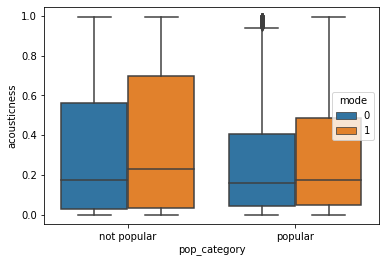

In [99]:
acousticness = sns.boxplot(x='pop_category', y='acousticness', hue='mode', data=musicframe)

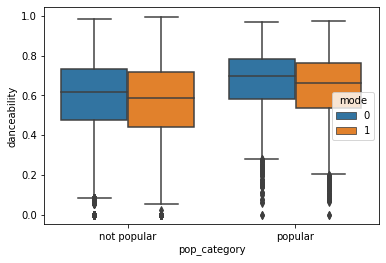

In [100]:
dance = sns.boxplot(x='pop_category', y='danceability', hue='mode', data=musicframe)

[(0, 400000)]

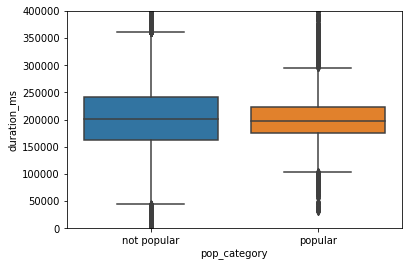

In [101]:
length = sns.boxplot(x='pop_category', y='duration_ms', data=musicframe)
length.set(ylim=(0, 400000))

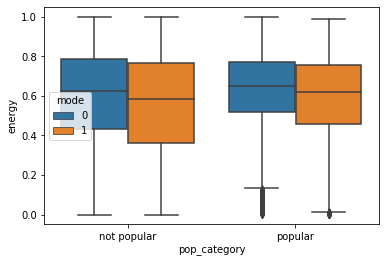

In [102]:
energy = sns.boxplot(x='pop_category', y='energy', hue='mode', data=musicframe)

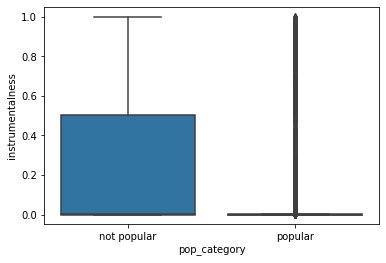

In [103]:
instr = sns.boxplot(x='pop_category', y='instrumentalness', data=musicframe)

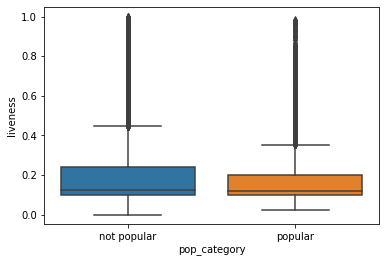

In [104]:
liveness = sns.boxplot(x='pop_category', y='liveness', data=musicframe)

[(-30, 2)]

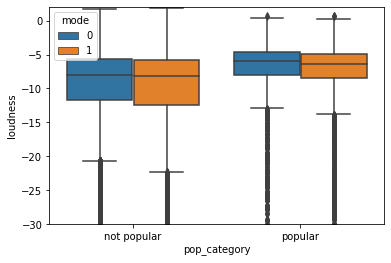

In [105]:
loudness = sns.boxplot(x='pop_category', y='loudness', hue='mode', data=musicframe)
loudness.set(ylim=(-30,2))

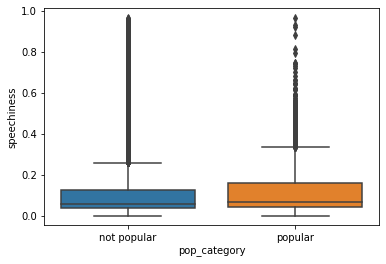

In [106]:
speechiness = sns.boxplot(x='pop_category', y='speechiness', data=musicframe)

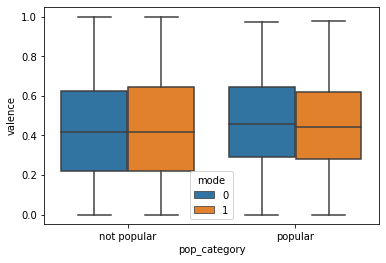

In [107]:
valence = sns.boxplot(x='pop_category', y='valence', hue='mode', data=musicframe)

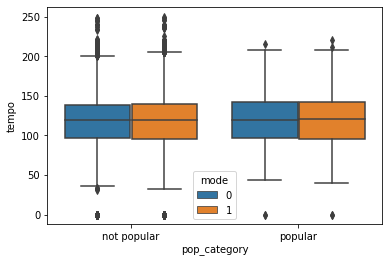

In [108]:
tempo = sns.boxplot(x='pop_category', y='tempo', hue='mode', data=musicframe)

Text(0.5, 1.0, 'Popularity Distribution')

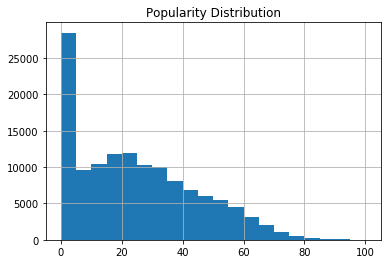

In [109]:
musicframe['popularity'].hist(bins=20)
plot.title('Popularity Distribution')

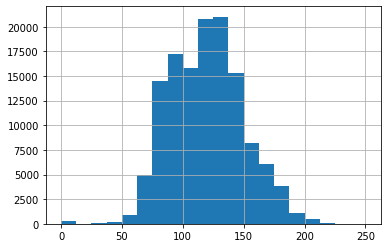

In [110]:
musicframe['tempo'].hist(bins=20)

In [111]:
minor = musicframe[musicframe['mode']==0]

In [112]:
minor.head()

,acousticness,acoustic_cat,danceability,dance_cat,duration_ms,duration_min,energy,energy_cat,instrumentalness,instr_cat,...,speechiness,speech_cat,tempo,tempo_cat,time_signature,time_cat,valence,valence_cat,pop_category,popularity
2,0.025000,0-0.2,0.603,0.6-0.8,138913,2-3 min,0.723,0.6-0.8,0.000,0-0.2,...,0.0454,0-0.2,114.966,100-120,4,4,0.382,0.2-0.4,not popular,56
3,0.029400,0-0.2,0.800,0.8-1,125381,2-3 min,0.579,0.4-0.6,0.912,0.8-1,...,0.0701,0-0.2,123.003,120-140,4,4,0.641,0.6-0.8,not popular,0
5,0.001150,0-0.2,0.810,0.8-1,124016,2-3 min,0.417,0.4-0.6,0.919,0.8-1,...,0.0793,0-0.2,120.025,120-140,4,4,0.837,0.8-1,not popular,0
6,0.000539,0-0.2,0.819,0.8-1,132742,2-3 min,0.720,0.6-0.8,0.863,0.8-1,...,0.1510,0-0.2,124.003,120-140,4,4,0.934,0.8-1,not popular,0
12,0.000223,0-0.2,0.796,0.6-0.8,132742,2-3 min,0.698,0.6-0.8,0.919,0.8-1,...,0.0792,0-0.2,123.973,120-140,4,4,0.964,0.8-1,not popular,0


Text(0.5, 1.0, 'Keys for minor-keyed songs')

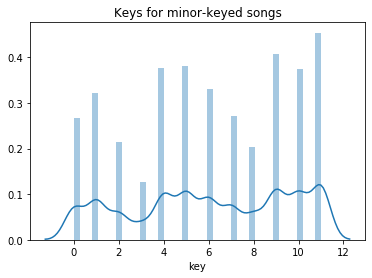

In [113]:
sns.distplot(minor['key'])
plot.title('Keys for minor-keyed songs')

B, A, F, and E minor are most common minor keys

In [114]:
major = musicframe[musicframe['mode']==1]
major.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,79409.000000,79409.000000,7.940900e+04,79409.000000,79409.000000,79409.000000,79409.000000,79409.000000,79409.0,79409.000000,79409.000000,79409.000000,79409.000000,79409.000000
mean,0.361153,0.572625,2.136543e+05,0.554711,0.223378,4.721795,0.194708,-10.163707,1.0,0.106666,119.467323,3.864008,0.441937,24.065345
std,0.353824,0.191446,1.317750e+05,0.265226,0.360609,3.563190,0.169012,6.687088,0.0,0.122928,30.557606,0.533608,0.262505,19.540012
min,0.000000,0.000000,3.677000e+03,0.000000,0.000000,0.000000,0.000000,-58.656000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033600,0.448000,1.621680e+05,0.368000,0.000000,1.000000,0.097300,-12.213000,1.0,0.037600,95.964000,4.000000,0.223000,7.000000
50%,0.225000,0.592000,2.014790e+05,0.586000,0.000133,5.000000,0.123000,-8.094000,1.0,0.052400,120.015000,4.000000,0.420000,21.000000
75%,0.691000,0.720000,2.416310e+05,0.767000,0.435000,8.000000,0.234000,-5.733000,1.0,0.115000,139.907000,4.000000,0.644000,37.000000
max,0.996000,0.996000,5.610020e+06,1.000000,1.000000,11.000000,0.999000,1.806000,1.0,0.966000,249.983000,5.000000,1.000000,98.000000


Text(0.5, 1.0, 'Keys for major-keyed songs')

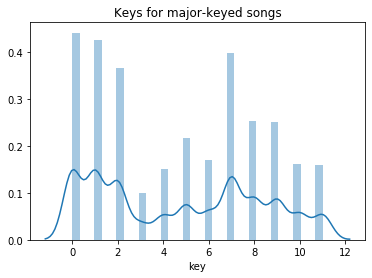

In [115]:
sns.distplot(major['key'])
plot.title('Keys for major-keyed songs')

C, C#, G, and D major are most common major keys

Text(0.5, 1.0, 'Tempo for major keyed songs')

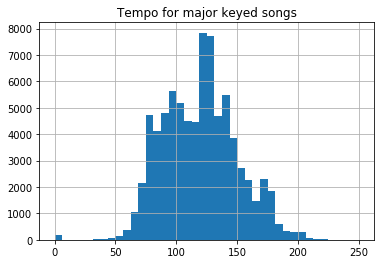

In [116]:
major['tempo'].hist(bins=40)
plot.title('Tempo for major keyed songs')

Text(0.5, 1.0, 'Tempo for minor keyed songs')

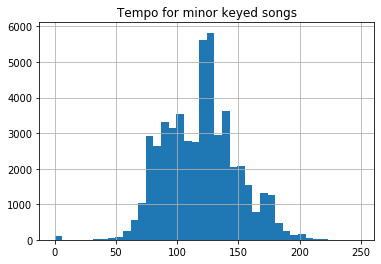

In [117]:
minor['tempo'].hist(bins=40)
plot.title('Tempo for minor keyed songs')

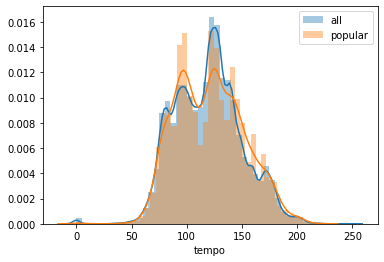

In [118]:
sns.distplot(musicframe['tempo'], label = 'all')
sns.distplot(popular['tempo'], label = 'popular')
plot.legend()
plot.show()

In [119]:
popular = musicframe[musicframe['popularity'] > 60]

# Duration

In [120]:
duration_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['duration_min']])
duration_count

duration_min,<1 min,1-2 min,2-3 min,3-4 min,4-5 min,5-6 min,>6 min
pop_category,,,,,,,
not popular,3471,10601,28298,49495,19642,6154,6547
popular,18,216,1676,3581,762,143,59


In [121]:
duration_count_all = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['duration_min']], margins=True)
duration_count_all

duration_min,<1 min,1-2 min,2-3 min,3-4 min,4-5 min,5-6 min,>6 min,All
pop_category,,,,,,,,
not popular,3471,10601,28298,49495,19642,6154,6547,124208
popular,18,216,1676,3581,762,143,59,6455
All,3489,10817,29974,53076,20404,6297,6606,130663


In [122]:
duration_count2 = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['duration_min']],normalize='columns')*100
duration_count2.round(2)

duration_min,<1 min,1-2 min,2-3 min,3-4 min,4-5 min,5-6 min,>6 min
pop_category,,,,,,,
not popular,99.48,98.0,94.41,93.25,96.27,97.73,99.11
popular,0.52,2.0,5.59,6.75,3.73,2.27,0.89


In [123]:
duration_stats = musicframe.groupby(['duration_min'])[['popularity']].aggregate('mean')
duration_stats

,popularity
duration_min,
<1 min,13.209516
1-2 min,17.011094
2-3 min,24.334523
3-4 min,27.377383
4-5 min,24.200451
5-6 min,21.743846
>6 min,18.154708


In [124]:
chisquare(duration_count.loc['popular'], f_exp=(duration_count.loc['popular']+duration_count.loc['not popular'])*pop_ratio)

Power_divergenceResult(statistic=1074.2469185762031, pvalue=7.78002307727329e-229)

In [125]:
(duration_count.loc['popular']+duration_count.loc['not popular'])*(pop_ratio)

duration_min
<1 min      172.363217
1-2 min     534.380314
2-3 min    1480.772445
3-4 min    2622.055058
4-5 min    1007.996296
5-6 min     311.083742
>6 min      326.348928
dtype: float64

Text(0.5, 1.0, 'Duration Count')

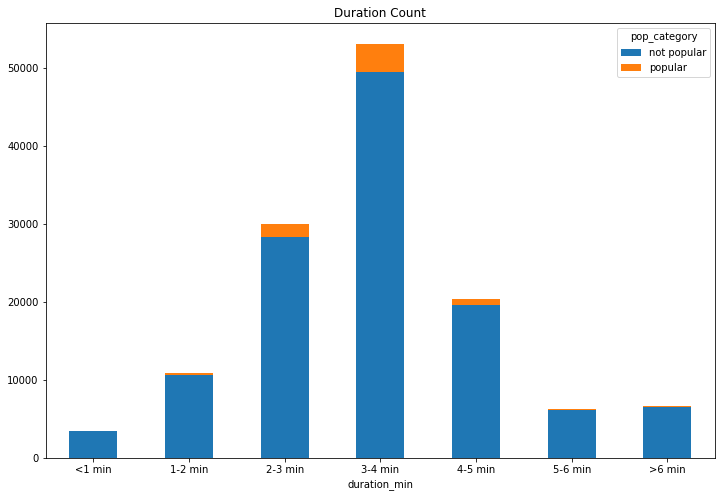

In [126]:
duration_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Duration Count')

Text(0.5, 1.0, 'Duration Percent Popular')

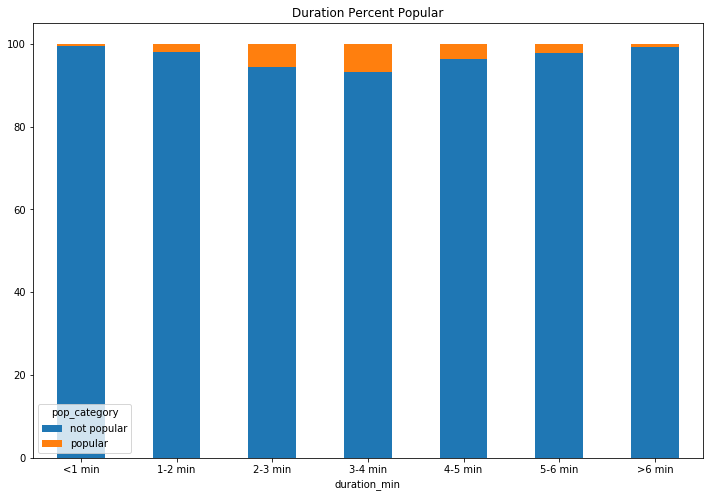

In [127]:
duration_count2.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Duration Percent Popular')

Text(0.5, 1.0, 'Popularity vs Duration for all songs')

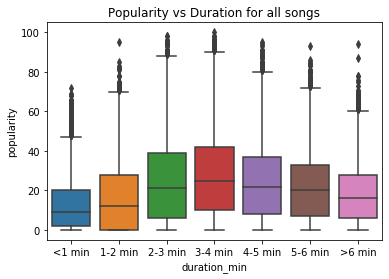

In [128]:
duration = sns.boxplot(x='duration_min', y='popularity', data=musicframe)
plot.title('Popularity vs Duration for all songs')

Text(0.5, 1.0, 'Popularity vs Duration for popular songs')

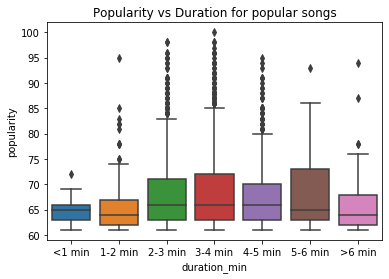

In [129]:
duration_pop = sns.boxplot(x='duration_min', y='popularity', data=popular)
plot.title('Popularity vs Duration for popular songs')

# Loudness

In [130]:
db_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['db_cat']])
db_count

db_cat,<-20,-20 to -15,-15 to -10,-10 to -5,-5 to 0,0+
pop_category,,,,,,
not popular,11715,9315,23567,58761,20798,52
popular,245,128,574,3632,1867,9


Text(0.5, 1.0, 'Loudness Count')

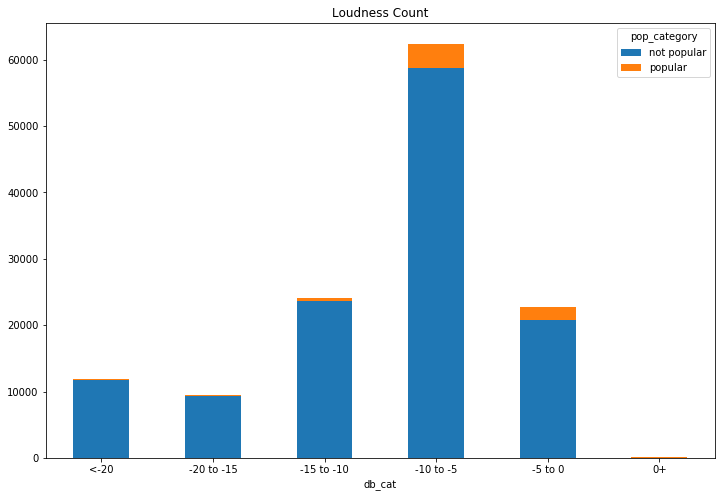

In [131]:
db_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Loudness Count')

In [132]:
db_obs = db_count.loc['popular'].append(db_count.loc['not popular'])
db_exp = ((db_count.loc['popular']+db_count.loc['not popular'])*(pop_ratio)).append((db_count.loc['popular']+db_count.loc['not popular'])*(1-pop_ratio))
db_exp

db_cat
<-20            590.846682
-20 to -15      466.502108
-15 to -10     1192.611183
-10 to -5      3082.332527
-5 to 0        1119.693984
0+                3.013516
<-20          11369.153318
-20 to -15     8976.497892
-15 to -10    22948.388817
-10 to -5     59310.667473
-5 to 0       21545.306016
0+               57.986484
dtype: float64

In [133]:
db_obs

db_cat
<-20            245
-20 to -15      128
-15 to -10      574
-10 to -5      3632
-5 to 0        1867
0+                9
<-20          11715
-20 to -15     9315
-15 to -10    23567
-10 to -5     58761
-5 to 0       20798
0+               52
dtype: int64

In [134]:
db_count2 = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['db_cat']],normalize='columns')*100
db_count2.round(2)

db_cat,<-20,-20 to -15,-15 to -10,-10 to -5,-5 to 0,0+
pop_category,,,,,,
not popular,97.95,98.64,97.62,94.18,91.76,85.25
popular,2.05,1.36,2.38,5.82,8.24,14.75


Text(0.5, 1.0, 'Loudness Percent Popular')

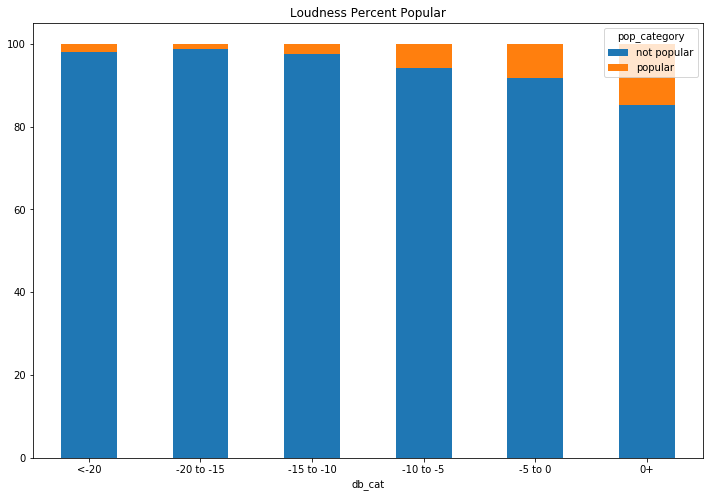

In [135]:
db_count2.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Loudness Percent Popular')

In [136]:
chisquare(db_obs, f_exp=db_exp)

Power_divergenceResult(statistic=1449.2112361830625, pvalue=2.8978847928137325e-304)

In [137]:
loud_stats = musicframe.groupby(['db_cat'])[['popularity']].aggregate('mean')
loud_stats

,popularity
db_cat,
<-20,14.836622
-20 to -15,15.508948
-15 to -10,20.267636
-10 to -5,26.559534
-5 to 0,30.501213
0+,26.262295


Text(0.5, 1.0, 'Popularity vs Loudness for all songs')

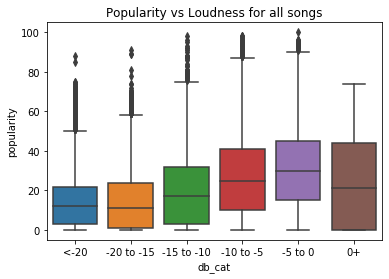

In [138]:
loud = sns.boxplot(x='db_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Loudness for all songs')

Text(0.5, 1.0, 'Popularity vs Loudness for popular songs')

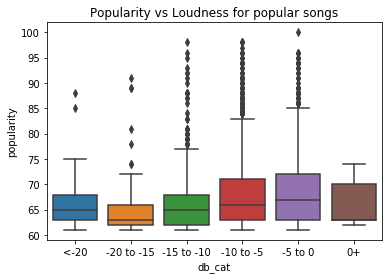

In [139]:
loud_pop = sns.boxplot(x='db_cat', y='popularity', data=popular)
plot.title('Popularity vs Loudness for popular songs')

# Tonality

In [140]:
keys = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['mode'], musicframe['key']])
keys

mode             0                                                        ...  \
key             0     1     2     3     4     5     6     7     8     9   ...   
pop_category                                                              ...   
not popular   3484  4153  2817  1662  4903  4945  4278  3554  2654  5353  ...   
popular        175   282   142    80   262   287   270   179   156   234  ...   

mode             1                                                        
key             2     3     4     5     6     7     8     9     10    11  
pop_category                                                              
not popular   9011  2479  3700  5317  4103  9774  6131  6173  3957  3874  
popular        393    94   180   267   256   423   358   269   198   226  

[2 rows x 24 columns]

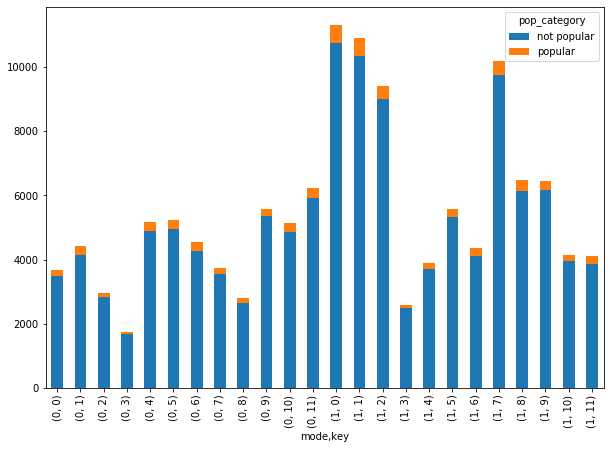

In [141]:
keys.T.plot(kind='bar', stacked=True, figsize=(10,7))

In [142]:
keys_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['mode'], musicframe['key']], normalize='columns')*100
keys_per.round(2)

mode              0                                                        \
key              0      1     2      3      4      5      6     7      8    
pop_category                                                                
not popular   95.22  93.64  95.2  95.41  94.93  94.51  94.06  95.2  94.45   
popular        4.78   6.36   4.8   4.59   5.07   5.49   5.94   4.8   5.55   

mode                 ...      1                                            \
key              9   ...     2      3      4      5      6      7      8    
pop_category         ...                                                    
not popular   95.81  ...  95.82  96.35  95.36  95.22  94.13  95.85  94.48   
popular        4.19  ...   4.18   3.65   4.64   4.78   5.87   4.15   5.52   

mode                               
key              9      10     11  
pop_category                       
not popular   95.82  95.23  94.49  
popular        4.18   4.77   5.51  

[2 rows x 24 columns]

In [143]:
keys_per.loc['popular'].sort_values(ascending=False)

mode  key
0     1      6.358512
      6      5.936675
1     6      5.872907
0     10     5.599844
      8      5.551601
1     8      5.517029
      11     5.512195
0     5      5.485474
1     1      5.158985
0     11     5.143407
      4      5.072604
1     0      4.879342
0     2      4.798919
      7      4.795071
      0      4.782728
1     5      4.781519
      10     4.765343
      4      4.639175
0     3      4.592423
      9      4.188294
1     2      4.179073
      9      4.175722
      7      4.148279
      3      3.653323
Name: popular, dtype: float64

C# minor and F# minor are most likely to have a popular song

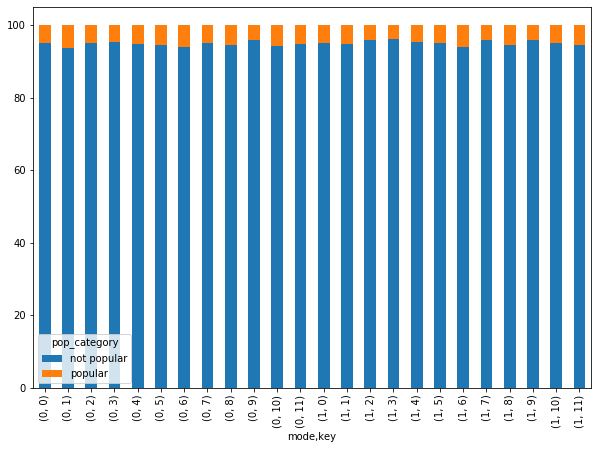

In [144]:
keys_per.T.plot(kind='bar', stacked=True, figsize=(10,7))

In [145]:
keys_obs = keys.loc['popular'].append(keys.loc['not popular'])
keys_obs

mode  key
0     0        175
      1        282
      2        142
      3         80
      4        262
      5        287
      6        270
      7        179
      8        156
      9        234
      10       288
      11       321
1     0        552
      1        563
      2        393
      3         94
      4        180
      5        267
      6        256
      7        423
      8        358
      9        269
      10       198
      11       226
0     0       3484
      1       4153
      2       2817
      3       1662
      4       4903
      5       4945
      6       4278
      7       3554
      8       2654
      9       5353
      10      4855
      11      5920
1     0      10761
      1      10350
      2       9011
      3       2479
      4       3700
      5       5317
      6       4103
      7       9774
      8       6131
      9       6173
      10      3957
      11      3874
dtype: int64

In [146]:
keys_obs = keys.loc['popular'].append(keys.loc['not popular'])
keys_exp = ((keys.loc['popular']+keys.loc['not popular'])*(pop_ratio)).append(
    (keys.loc['popular']+keys.loc['not popular'])*(1-pop_ratio))
chisquare(keys_obs, f_exp=keys_exp)

Power_divergenceResult(statistic=107.68906006575781, pvalue=1.1563036285979117e-06)

In [147]:
keys_obs

mode  key
0     0        175
      1        282
      2        142
      3         80
      4        262
      5        287
      6        270
      7        179
      8        156
      9        234
      10       288
      11       321
1     0        552
      1        563
      2        393
      3         94
      4        180
      5        267
      6        256
      7        423
      8        358
      9        269
      10       198
      11       226
0     0       3484
      1       4153
      2       2817
      3       1662
      4       4903
      5       4945
      6       4278
      7       3554
      8       2654
      9       5353
      10      4855
      11      5920
1     0      10761
      1      10350
      2       9011
      3       2479
      4       3700
      5       5317
      6       4103
      7       9774
      8       6131
      9       6173
      10      3957
      11      3874
dtype: int64

In [148]:
keys_stats = musicframe.groupby(['mode','key'])[['popularity']].aggregate('mean')
keys_stats

popularity
mode key            
0    0     24.271386
     1     26.143405
     2     23.977019
     3     24.185419
     4     24.293514
     5     24.708333
     6     25.456025
     7     24.067238
     8     25.317438
     9     22.934849
     10    23.781256
     11    24.423490
1    0     24.042959
     1     23.899844
     2     23.885262
     3     22.319860
     4     24.544845
     5     23.741225
     6     25.768295
     7     22.538099
     8     24.959162
     9     24.405775
     10    24.136943
     11    26.029512

Text(0.5, 1.0, 'Popularity vs Key for all songs')

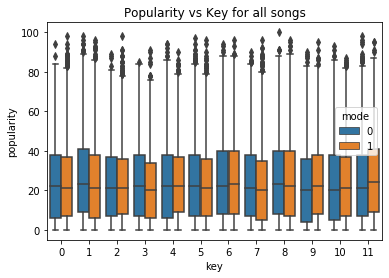

In [149]:
keys = sns.boxplot(x='key', y='popularity', hue='mode', data=musicframe)
plot.title('Popularity vs Key for all songs')

Text(0.5, 1.0, 'Popularity vs Key for popular songs')

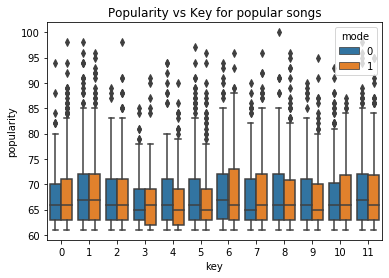

In [150]:
keys_pop = sns.boxplot(x='key', y='popularity', hue='mode', data=popular)
plot.title('Popularity vs Key for popular songs')

In [151]:
mode_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['mode']], normalize='columns')*100
mode_per.round(2)

mode,0,1
pop_category,,
not popular,94.78,95.24
popular,5.22,4.76


# Tempo

In [152]:
tempo_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['tempo_cat']])
tempo_count

tempo_cat,<60,60-80,80-100,100-120,120-140,140-160,160+
pop_category,,,,,,,
not popular,658,10673,24638,24850,34327,16278,12496
popular,17,501,1407,1209,1505,1062,750


Text(0.5, 1.0, 'Tempo Count')

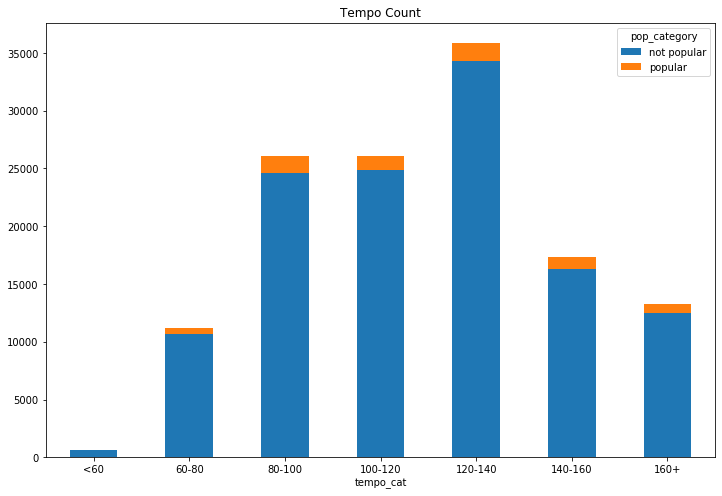

In [153]:
tempo_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Tempo Count')

In [154]:
tempo_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['tempo_cat']],normalize='columns')*100
tempo_per.round(2)

tempo_cat,<60,60-80,80-100,100-120,120-140,140-160,160+
pop_category,,,,,,,
not popular,97.48,95.52,94.6,95.36,95.8,93.88,94.34
popular,2.52,4.48,5.4,4.64,4.2,6.12,5.66


Text(0.5, 1.0, 'Tempo Percent Popular')

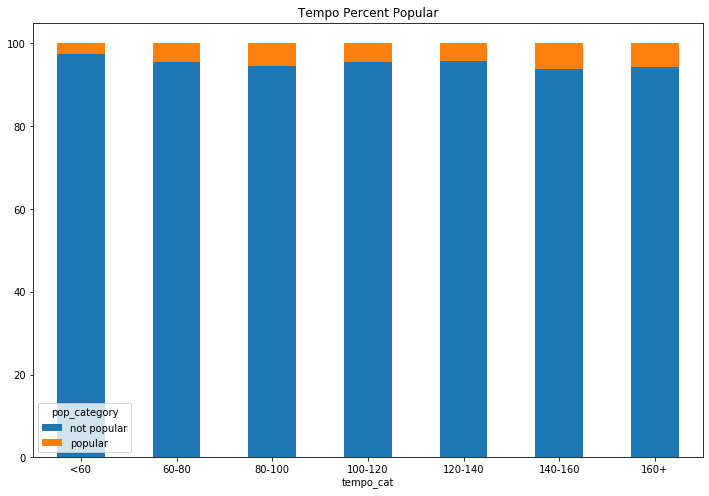

In [155]:
tempo_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Tempo Percent Popular')

In [156]:
tempo_stats = musicframe.groupby(['tempo_cat'])[['popularity']].aggregate('mean')
tempo_stats

,popularity
tempo_cat,
<60,16.783704
60-80,22.476105
80-100,24.696525
100-120,24.356537
120-140,22.997739
140-160,26.287428
160+,25.630530


Text(0.5, 1.0, 'Popularity vs Tempo for all songs')

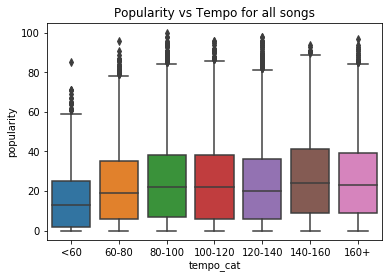

In [157]:
tempo = sns.boxplot(x='tempo_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Tempo for all songs')

Text(0.5, 1.0, 'Popularity vs Tempo for popular songs')

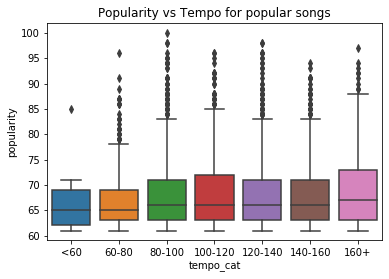

In [158]:
tempo_pop = sns.boxplot(x='tempo_cat', y='popularity', data=popular)
plot.title('Popularity vs Tempo for popular songs')

# Time Signature

In [159]:
time_cat = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['time_cat']])
time_cat

time_cat,4,mixed/irregular
pop_category,,
not popular,106713,17495
popular,5939,516


In [160]:
time_obs = time_cat.loc['popular'].append(time_cat.loc['not popular'])
time_exp = ((time_cat.loc['popular']+time_cat.loc['not popular'])*(pop_ratio)).append((time_cat.loc['popular']+time_cat.loc['not popular'])*(1-pop_ratio))
time_exp

time_cat
4                    5565.222442
mixed/irregular       889.777558
4                  107086.777558
mixed/irregular     17121.222442
dtype: float64

In [161]:
chisquare(time_obs, f_exp=time_exp)

Power_divergenceResult(statistic=191.58511821776327, pvalue=2.77453674506288e-41)

Text(0.5, 1.0, 'Time Signature Popular Count')

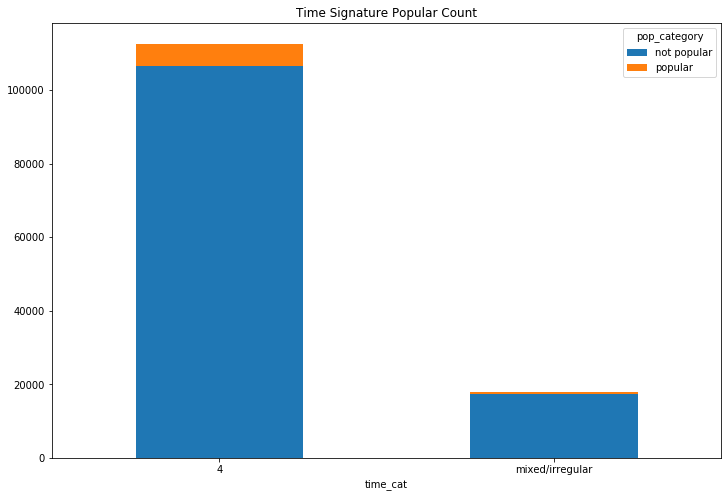

In [162]:
time_cat.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Time Signature Popular Count')

In [163]:
time_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['time_cat']], normalize='columns')*100
time_per.round(2)

time_cat,4,mixed/irregular
pop_category,,
not popular,94.73,97.14
popular,5.27,2.86


Text(0.5, 1.0, 'Time Signature Percent Popular')

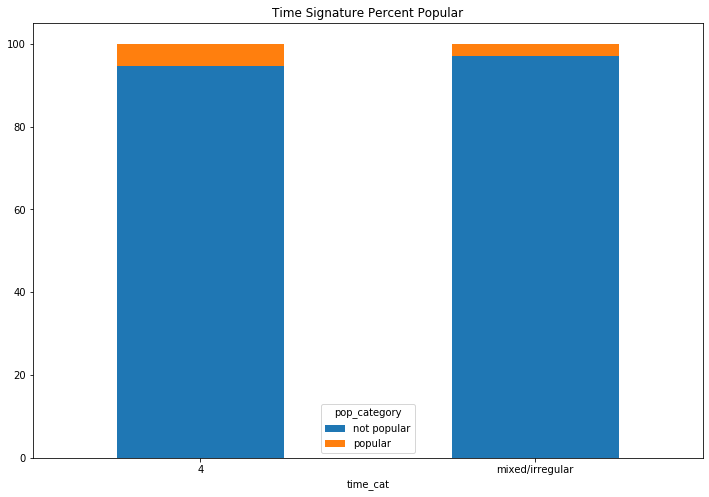

In [164]:
time_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Time Signature Percent Popular')

In [165]:
time_stats = musicframe.groupby(['time_cat'])[['popularity']].aggregate('mean')
time_stats

,popularity
time_cat,
4,24.953361
mixed/irregular,19.553217


Text(0.5, 1.0, 'Popularity vs Time Signature for all songs')

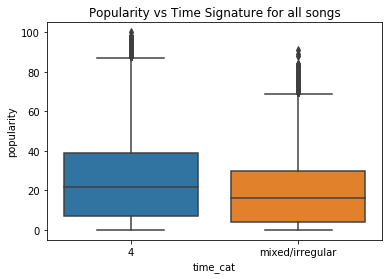

In [166]:
time_sig = sns.boxplot(x='time_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Time Signature for all songs')

Text(0.5, 1.0, 'Popularity vs Time Signature for popular songs')

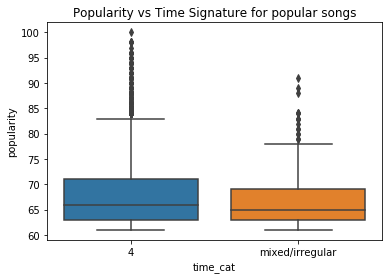

In [167]:
time_pop = sns.boxplot(x='time_cat', y='popularity', data=popular)
plot.title('Popularity vs Time Signature for popular songs')

In [168]:
a = keys.loc['popular'].append(keys.loc['not popular'])

AttributeError: 'AxesSubplot' object has no attribute 'loc'

In [169]:
f_exp_keys = (keys.loc['popular']+keys.loc['not popular'])*(6455/130663)

AttributeError: 'AxesSubplot' object has no attribute 'loc'

In [170]:
f_exp_keys2 = (keys.loc['popular']+keys.loc['not popular'])*((130663-6455)/130663)

AttributeError: 'AxesSubplot' object has no attribute 'loc'

In [171]:
b = f_exp_keys.append(f_exp_keys2)

NameError: name 'f_exp_keys' is not defined

In [172]:
chisquare(a, f_exp=b)

NameError: name 'a' is not defined

In [173]:
chisquare(keys.loc['popular'], f_exp=f_exp_keys)

AttributeError: 'AxesSubplot' object has no attribute 'loc'

# Acousticness

In [174]:
acoustic_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['acoustic_cat']])
acoustic_count

acoustic_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,61383,17137,11962,11110,22616
popular,3516,1132,623,492,692


Text(0.5, 1.0, 'Acousticness Popular Count')

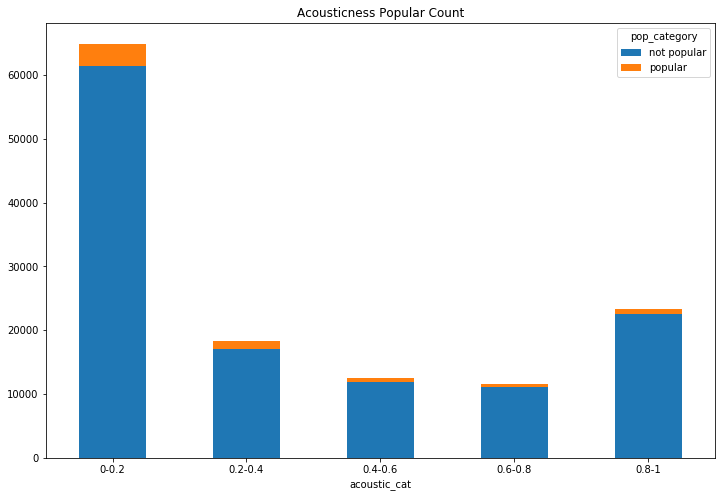

In [175]:
acoustic_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Acousticness Popular Count')

In [176]:
acoustic_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['acoustic_cat']], normalize='columns')*100
acoustic_per.round(2)

acoustic_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,94.58,93.8,95.05,95.76,97.03
popular,5.42,6.2,4.95,4.24,2.97


Text(0.5, 1.0, 'Acousticness Percent Popular')

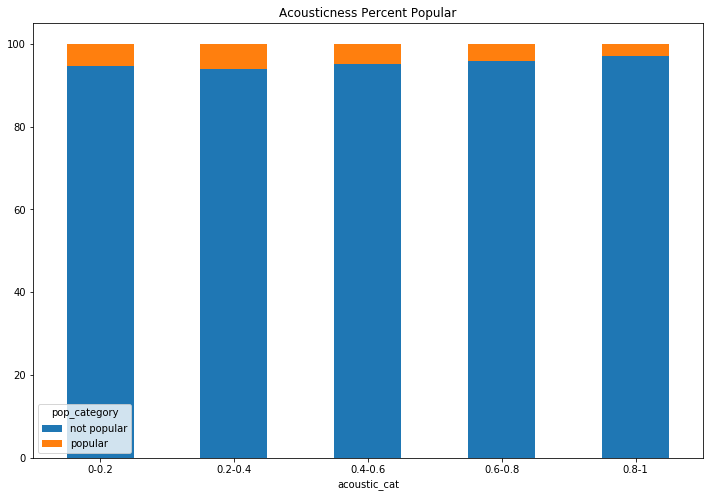

In [177]:
acoustic_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Acousticness Percent Popular')

In [178]:
acoustic_obs = acoustic_count.loc['popular'].append(acoustic_count.loc['not popular'])
acoustic_exp = ((acoustic_count.loc['popular']+acoustic_count.loc['not popular'])*(pop_ratio)).append((acoustic_count.loc['popular']+acoustic_count.loc['not popular'])*(1-pop_ratio))
chisquare(acoustic_obs, f_exp=acoustic_exp)

Power_divergenceResult(statistic=297.8391149673827, pvalue=7.498990437396779e-59)

In [179]:
acoustic_stats = musicframe.groupby(['acoustic_cat'])[['popularity']].aggregate('mean')
acoustic_stats

,popularity
acoustic_cat,
0-0.2,25.580933
0.2-0.4,26.203733
0.4-0.6,24.838617
0.6-0.8,24.078176
0.8-1,18.550583


Text(0.5, 1.0, 'Popularity vs Acousticness for all songs')

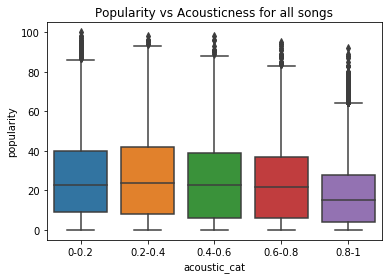

In [180]:
acousticness = sns.boxplot(x='acoustic_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Acousticness for all songs')

Text(0.5, 1.0, 'Popularity vs Acousticness for popular songs')

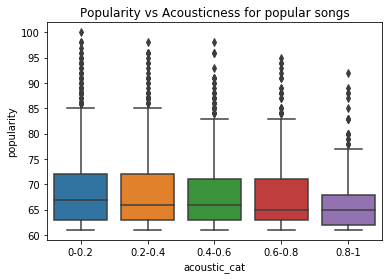

In [181]:
acoustic_pop = sns.boxplot(x='acoustic_cat', y='popularity', data=popular)
plot.title('Popularity vs Acousticness for popular songs')

# Danceability

In [182]:
dance_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['dance_cat']])
dance_count

dance_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,5285,17140,38914,48175,14694
popular,98,411,1579,3124,1243


Text(0.5, 1.0, 'Danceability Popular Count')

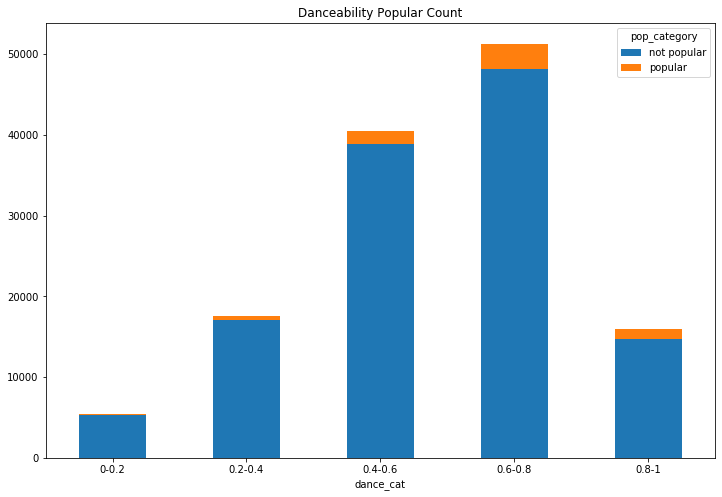

In [183]:
dance_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Danceability Popular Count')

In [184]:
dance_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['dance_cat']], normalize='columns')*100
dance_per.round(2)

dance_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,98.18,97.66,96.1,93.91,92.2
popular,1.82,2.34,3.9,6.09,7.8


Text(0.5, 1.0, 'Danceability Percent Popular')

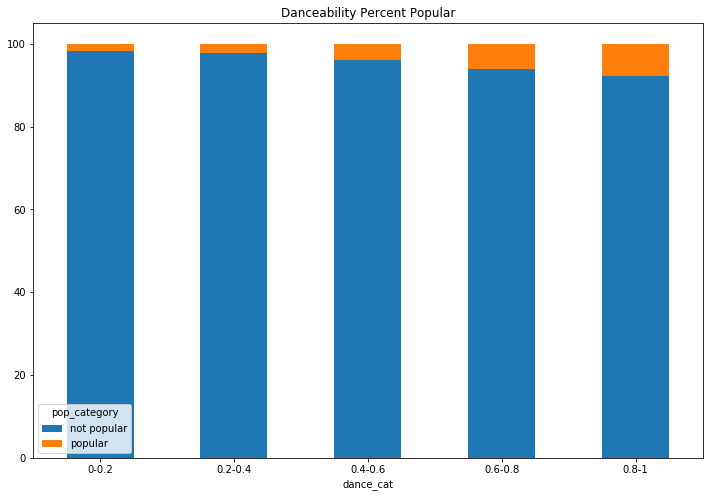

In [185]:
dance_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Danceability Percent Popular')

In [186]:
dance_stats = musicframe.groupby(['dance_cat'])[['popularity']].aggregate('mean')
dance_stats

,popularity
dance_cat,
0-0.2,15.796396
0.2-0.4,19.851177
0.4-0.6,24.282493
0.6-0.8,25.838515
0.8-1,26.417644


Text(0.5, 1.0, 'Popularity vs Danceability for all songs')

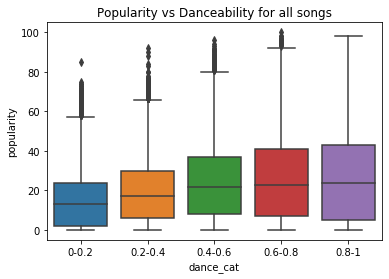

In [187]:
dance = sns.boxplot(x='dance_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Danceability for all songs')

Text(0.5, 1.0, 'Popularity vs Danceability for popular songs')

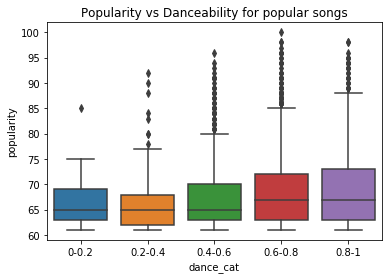

In [188]:
dance_pop = sns.boxplot(x='dance_cat', y='popularity', data=popular)
plot.title('Popularity vs Danceability for popular songs')

# Energy

In [189]:
energy_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['energy_cat']])
energy_count

energy_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,15336,16841,29847,35099,27085
popular,400,638,1815,2391,1211


Text(0.5, 1.0, 'Energy Popular Count')

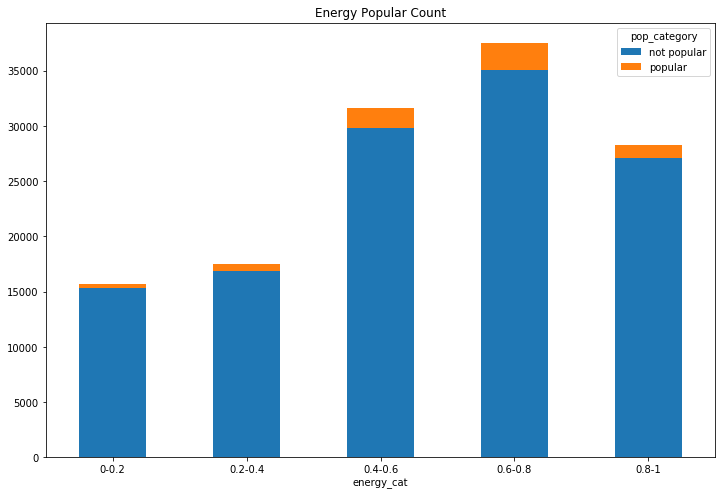

In [190]:
energy_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Energy Popular Count')

In [191]:
energy_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['energy_cat']], normalize='columns')*100
energy_per.round(2)

energy_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,97.46,96.35,94.27,93.62,95.72
popular,2.54,3.65,5.73,6.38,4.28


Text(0.5, 1.0, 'Energy Percent Popular')

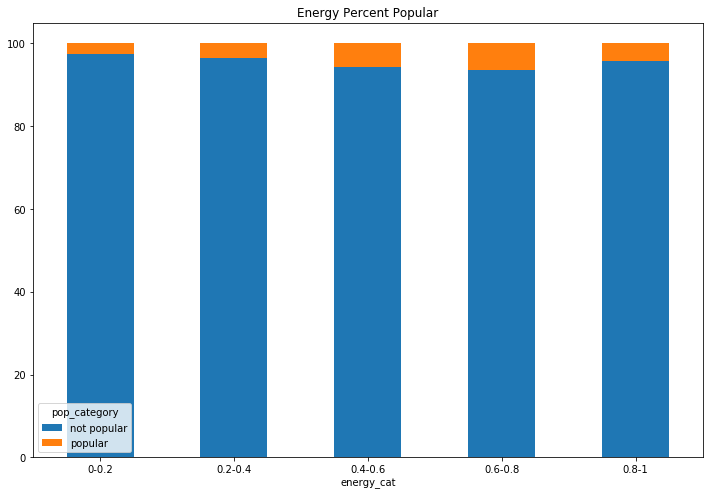

In [192]:
energy_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Energy Percent Popular')

In [193]:
energy_stats = musicframe.groupby(['energy_cat'])[['popularity']].aggregate('mean')
energy_stats

,popularity
energy_cat,
0-0.2,16.989642
0.2-0.4,22.465130
0.4-0.6,25.133978
0.6-0.8,26.503388
0.8-1,25.226110


Text(0.5, 1.0, 'Popularity vs Energy for all songs')

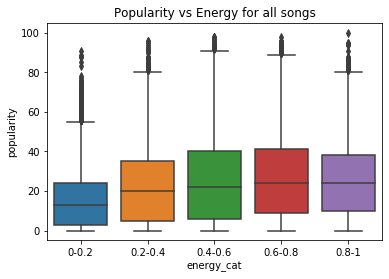

In [194]:
energy = sns.boxplot(x='energy_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Energy for all songs')

Text(0.5, 1.0, 'Popularity vs Energy for popular songs')

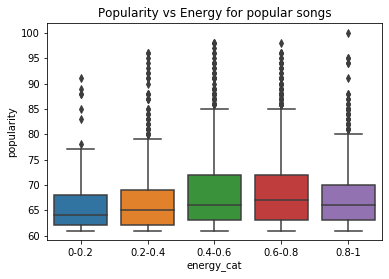

In [195]:
energy_pop = sns.boxplot(x='energy_cat', y='popularity', data=popular)
plot.title('Popularity vs Energy for popular songs')

# Instrumentalness

In [196]:
instr_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['instr_cat']])
instr_count

instr_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,87730,3702,3596,6486,22694
popular,5805,76,53,100,421


Text(0.5, 1.0, 'Instrumentalness Popular Count')

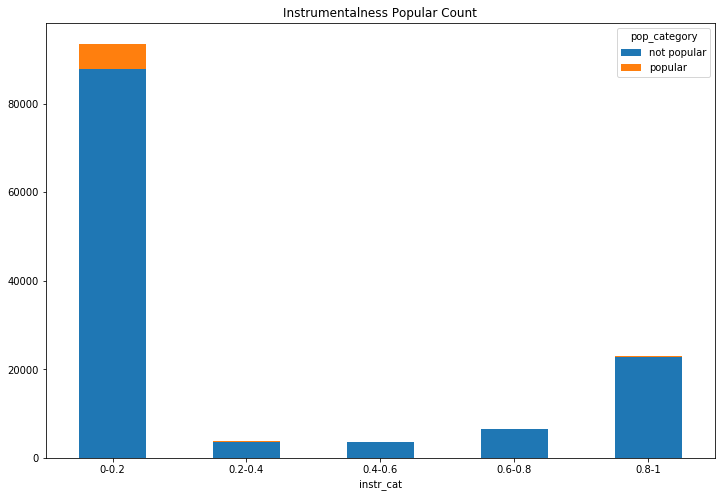

In [197]:
instr_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Instrumentalness Popular Count')

In [198]:
instr_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['instr_cat']], normalize='columns')*100
instr_per.round(2)

instr_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,93.79,97.99,98.55,98.48,98.18
popular,6.21,2.01,1.45,1.52,1.82


Text(0.5, 1.0, 'Instrumentalness Percent Popular')

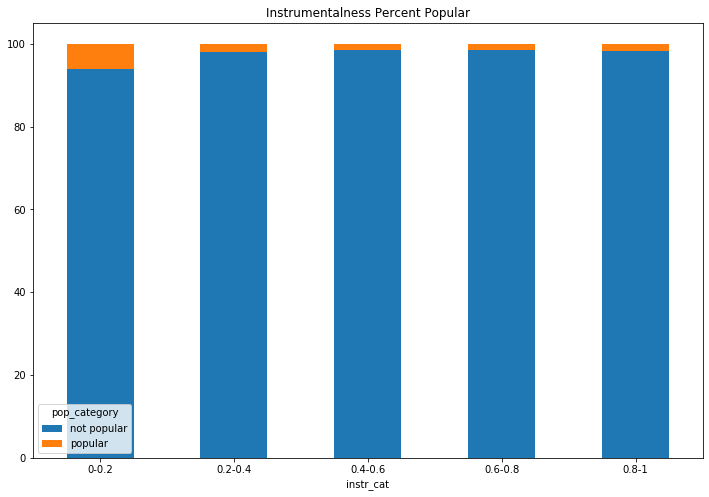

In [199]:
instr_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Instrumentalness Percent Popular')

In [200]:
instr_stats = musicframe.groupby(['instr_cat'])[['popularity']].aggregate('mean')
instr_stats

,popularity
instr_cat,
0-0.2,26.802951
0.2-0.4,21.473796
0.4-0.6,19.943820
0.6-0.8,18.391740
0.8-1,16.490331


Text(0.5, 1.0, 'Popularity vs Instrumentalness for all songs')

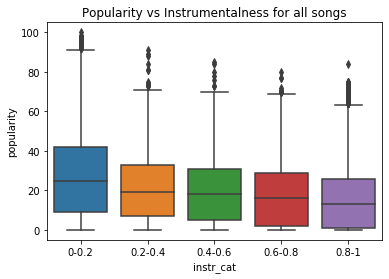

In [201]:
instru = sns.boxplot(x='instr_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Instrumentalness for all songs')

Text(0.5, 1.0, 'Popularity vs Instrumentalness for popular songs')

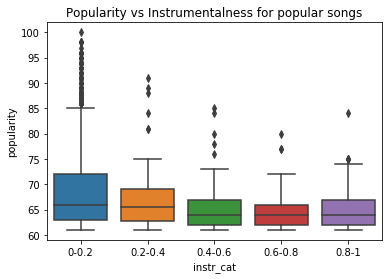

In [202]:
instr_pop = sns.boxplot(x='instr_cat', y='popularity', data=popular)
plot.title('Popularity vs Instrumentalness for popular songs')

# Liveness

In [203]:
live_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['live_cat']])
live_count

live_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,87312,25391,5611,3642,2252
popular,4833,1234,240,104,44


In [204]:
live_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['live_cat']], normalize='columns')*100
live_per.round(2)

live_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,94.76,95.37,95.9,97.22,98.08
popular,5.24,4.63,4.1,2.78,1.92


Text(0.5, 1.0, 'Liveness Popular Count')

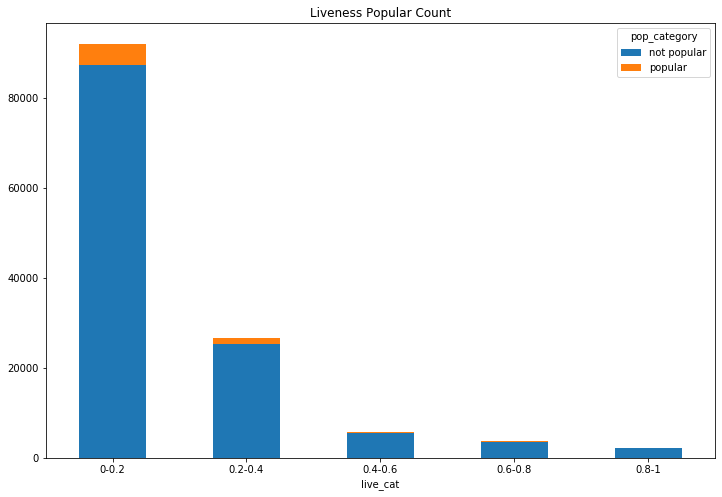

In [205]:
live_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Liveness Popular Count')

Text(0.5, 1.0, 'Liveness Percent Popular')

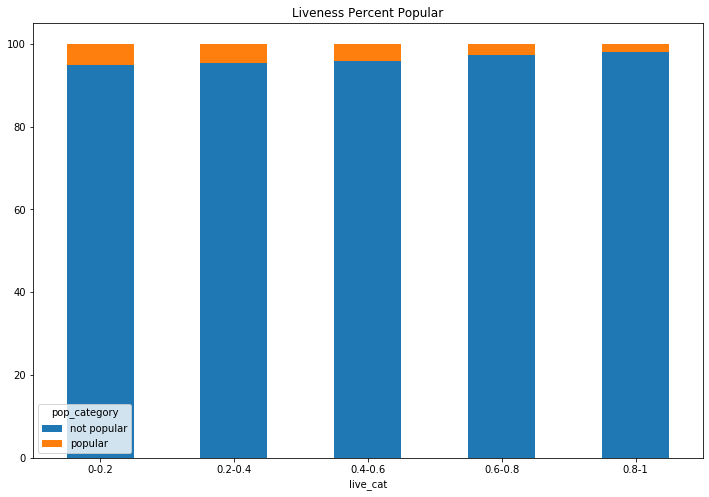

In [206]:
live_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Liveness Percent Popular')

In [207]:
live_stats = musicframe.groupby(['live_cat'])[['popularity']].aggregate('mean')
live_stats

,popularity
live_cat,
0-0.2,24.488144
0.2-0.4,24.148131
0.4-0.6,22.745343
0.6-0.8,21.701548
0.8-1,21.532230


Text(0.5, 1.0, 'Popularity vs Liveness for all songs')

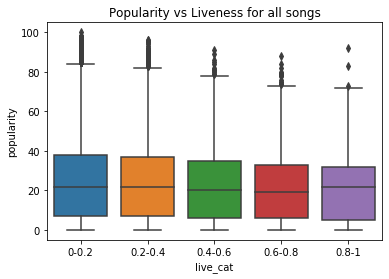

In [208]:
liveness = sns.boxplot(x='live_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Liveness for all songs')

Text(0.5, 1.0, 'Popularity vs Liveness for popular songs')

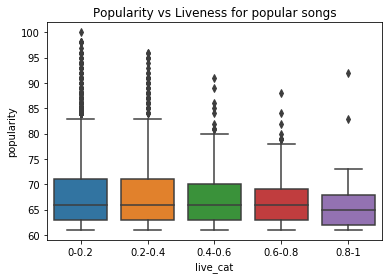

In [209]:
live_pop = sns.boxplot(x='live_cat', y='popularity', data=popular)
plot.title('Popularity vs Liveness for popular songs')

# Speechiness

In [210]:
speech_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['speech_cat']])
speech_count

speech_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,102128,16329,4641,586,524
popular,5127,1083,220,19,6


In [211]:
speech_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['speech_cat']], normalize='columns')*100
speech_per.round(2)

speech_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,95.22,93.78,95.47,96.86,98.87
popular,4.78,6.22,4.53,3.14,1.13


Text(0.5, 1.0, 'Speechiness Popular Count')

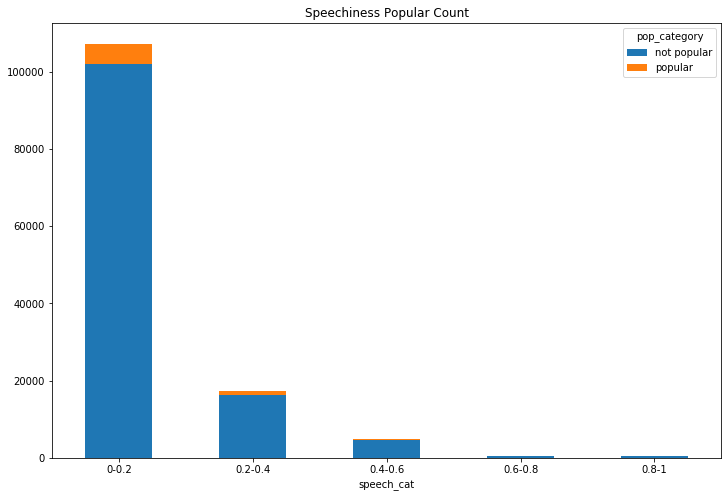

In [212]:
speech_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Speechiness Popular Count')

Text(0.5, 1.0, 'Speechiness Percent Popular')

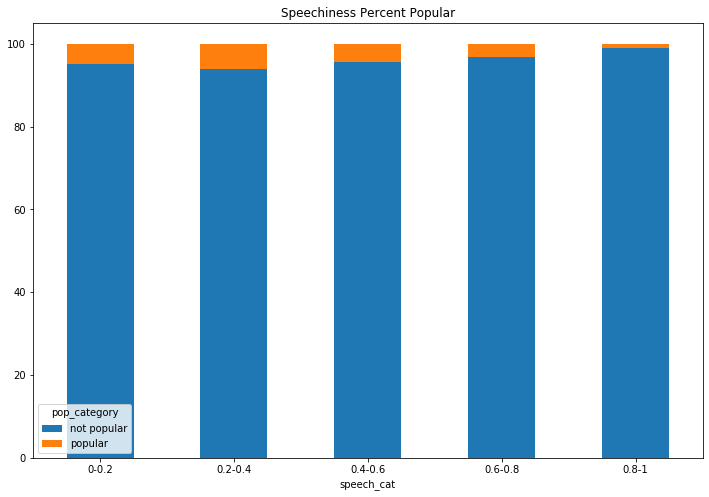

In [213]:
speech_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Speechiness Percent Popular')

In [214]:
speech_stats = musicframe.groupby(['speech_cat'])[['popularity']].aggregate('mean')
speech_stats

,popularity
speech_cat,
0-0.2,24.138343
0.2-0.4,25.468125
0.4-0.6,22.717754
0.6-0.8,18.515702
0.8-1,17.315094


Text(0.5, 1.0, 'Popularity vs Speechiness for all songs')

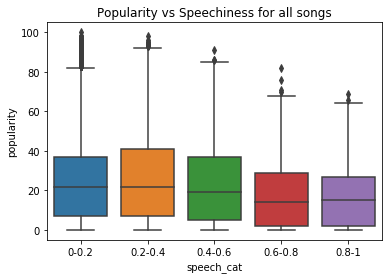

In [215]:
speech = sns.boxplot(x='speech_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Speechiness for all songs')

Text(0.5, 1.0, 'Popularity vs Speechiness for popular songs')

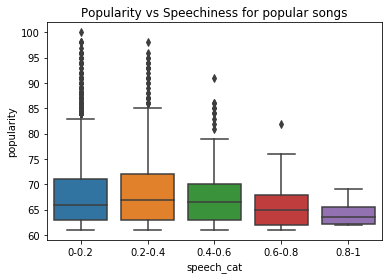

In [216]:
speech_pop = sns.boxplot(x='speech_cat', y='popularity', data=popular)
plot.title('Popularity vs Speechiness for popular songs')

# Valence

In [217]:
valence_count = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['valence_cat']])
valence_count

valence_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,28037,31478,29047,21822,13824
popular,928,1807,1855,1314,551


In [218]:
valence_per = pd.crosstab(index = musicframe['pop_category'], columns=[musicframe['valence_cat']], normalize='columns')*100
valence_per.round(2)

valence_cat,0-0.2,0.2-0.4,0.4-0.6,0.6-0.8,0.8-1
pop_category,,,,,
not popular,96.8,94.57,94.0,94.32,96.17
popular,3.2,5.43,6.0,5.68,3.83


Text(0.5, 1.0, 'Valence Popular Count')

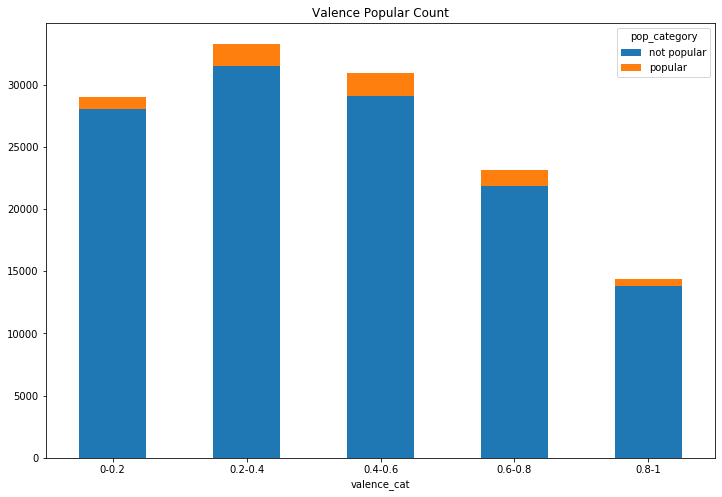

In [219]:
valence_count.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Valence Popular Count')

Text(0.5, 1.0, 'Valence Percent Popular')

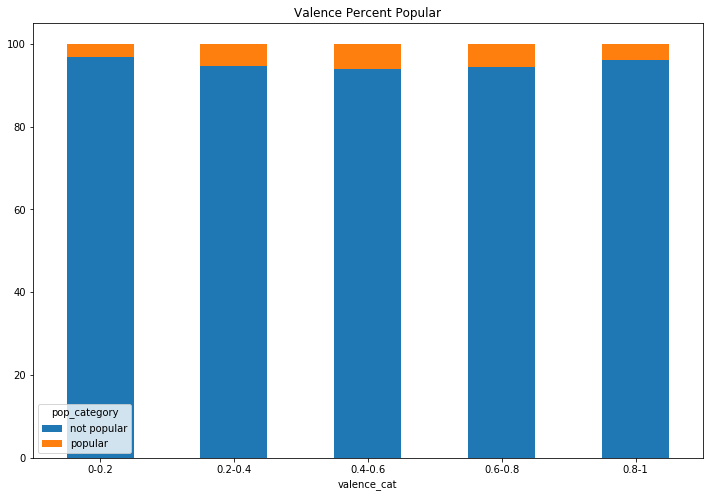

In [220]:
valence_per.T.plot(kind='bar', stacked=True, rot=0, figsize=(12,8))
plot.title('Valence Percent Popular')

In [221]:
val_stats = musicframe.groupby(['valence_cat'])[['popularity']].aggregate('mean')
val_stats

,popularity
valence_cat,
0-0.2,21.773865
0.2-0.4,25.466937
0.4-0.6,25.837098
0.6-0.8,25.000994
0.8-1,21.428243


Text(0.5, 1.0, 'Popularity vs Valence for all songs')

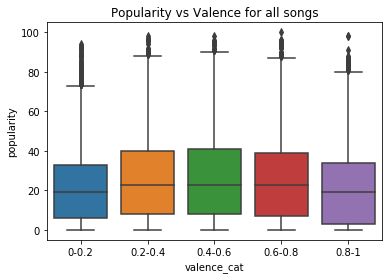

In [222]:
valence = sns.boxplot(x='valence_cat', y='popularity', data=musicframe)
plot.title('Popularity vs Valence for all songs')

Text(0.5, 1.0, 'Popularity vs Valence for popular songs')

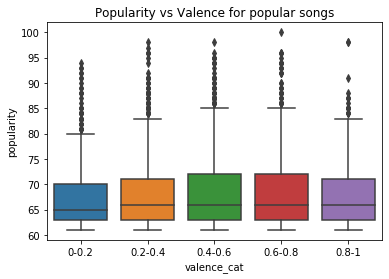

In [223]:
valence_pop = sns.boxplot(x='valence_cat', y='popularity', data=popular)
plot.title('Popularity vs Valence for popular songs')

## Extraneous

Text(0.5, 1.0, 'Energy vs Acousticness for all songs')

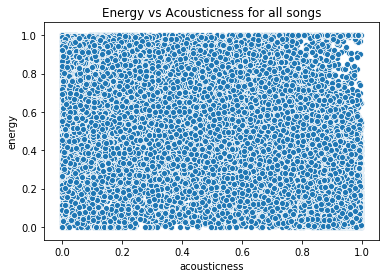

In [224]:
energy1 = sns.scatterplot(x='acousticness', y='energy', data=musicframe)
plot.title('Energy vs Acousticness for all songs')

Text(0.5, 1.0, 'Energy vs Acousticness for all songs')

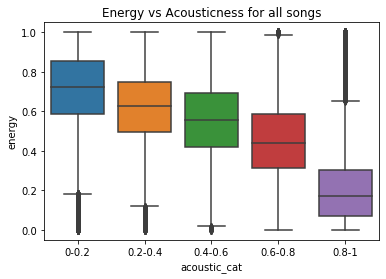

In [225]:
energy1 = sns.boxplot(x='acoustic_cat', y='energy', data=musicframe)
plot.title('Energy vs Acousticness for all songs')

Text(0.5, 1.0, 'Energy vs Acousticness for popular songs')

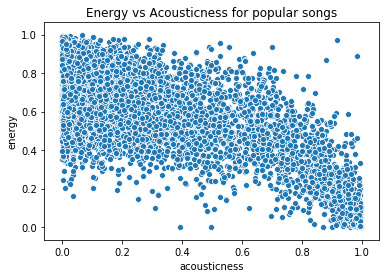

In [226]:
energy = sns.scatterplot(x='acousticness', y='energy', data=popular)
plot.title('Energy vs Acousticness for popular songs')

Text(0.5, 1.0, 'Energy vs Loudness for all songs')

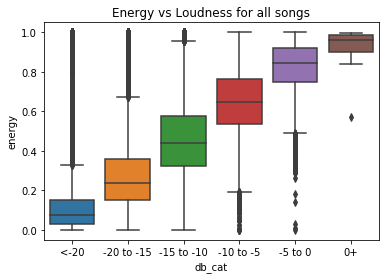

In [227]:
loudness1 = sns.boxplot(x='db_cat', y='energy', data=musicframe)
plot.title('Energy vs Loudness for all songs')

Text(0.5, 1.0, 'Energy vs Loudness for popular songs')

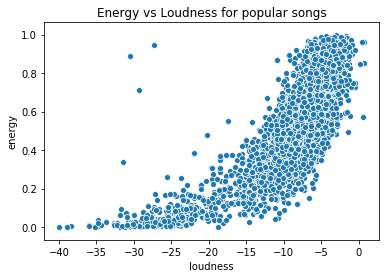

In [228]:
loudness = sns.scatterplot(x='loudness', y='energy', data=popular)
plot.title('Energy vs Loudness for popular songs')

Text(0.5, 1.0, 'Danceability vs Valence for all songs')

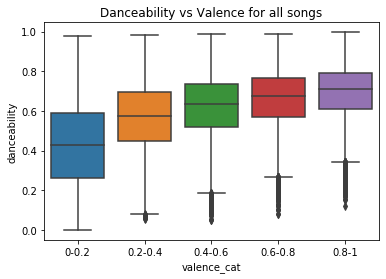

In [229]:
dance_val = sns.boxplot(x='valence_cat', y='danceability', data=musicframe)
plot.title('Danceability vs Valence for all songs')

Text(0.5, 1.0, 'Danceability vs Tempo for all songs')

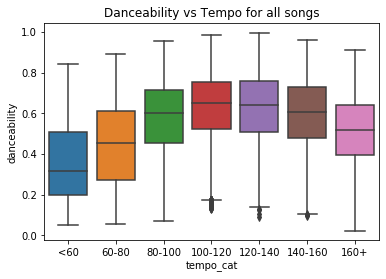

In [230]:
dance_tempo = sns.boxplot(x='tempo_cat', y='danceability', data=musicframe)
plot.title('Danceability vs Tempo for all songs')

Text(0.5, 1.0, 'Danceability vs Duration for all songs')

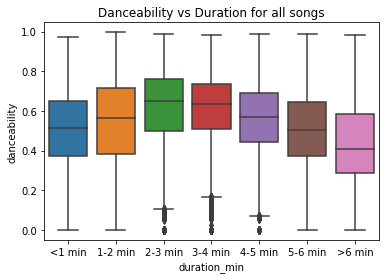

In [231]:
dance_duration = sns.boxplot(x='duration_min', y='danceability', data=musicframe)
plot.title('Danceability vs Duration for all songs')

Text(0.5, 1.0, 'Loudness vs Instrumentalness for all songs')

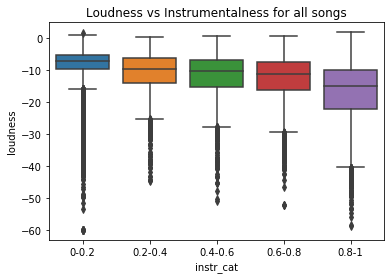

In [232]:
loud_instr = sns.boxplot(x='instr_cat', y='loudness', data=musicframe)
plot.title('Loudness vs Instrumentalness for all songs')

Text(0.5, 1.0, 'Valence vs Tempo for all songs')

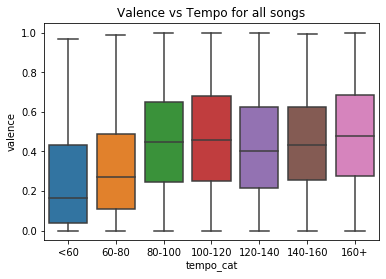

In [233]:
valence_tempo = sns.boxplot(x='tempo_cat', y='valence', data=musicframe)
plot.title('Valence vs Tempo for all songs')

Text(0.5, 1.0, 'Energy vs Tempo for all songs')

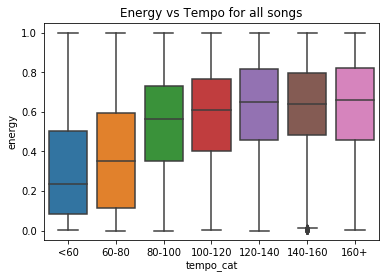

In [234]:
energy_tempo = sns.boxplot(x='tempo_cat', y='energy', data=musicframe)
plot.title('Energy vs Tempo for all songs')

### Trends and Correlation

In [235]:
popular[popular.columns[1:]].corr()['popularity'][:]

danceability        0.144092
duration_ms         0.027716
energy              0.075492
instrumentalness   -0.154851
key                -0.002880
liveness           -0.024393
loudness            0.129075
mode               -0.019897
speechiness         0.038962
tempo               0.037950
time_signature      0.040415
valence             0.043789
popularity          1.000000
Name: popularity, dtype: float64

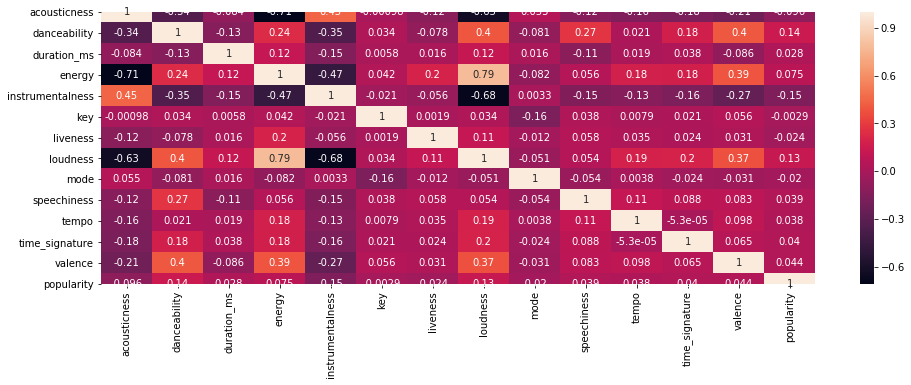

In [236]:
plot.figure(figsize = (16,5))
sns.heatmap(popular.corr(), annot=True)
plot.show()

When the value of Correlation is close to zero, generally between -0.1 and +0.1, the variables are said to have no linear relationship or a very weak linear relationship

### Machine Learning -
1) Based on the Analysis Pick the Attributes for creating the Model 

2) For feature selection, we will select the following features danceability , instrumentalness, loudness

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Label the data as Popular and NonPopularity 0 to 50 is makred as 0 and 51 to 100 as 1

In [238]:
musicframe.loc[musicframe['popularity'].between(0,60), 'popularity'] = 0 
musicframe.loc[musicframe['popularity'].between(61,100), 'popularity'] = 1 

### pick the feature Based on the analysys.

In [239]:
features = ["danceability", "instrumentalness","loudness"]

Next we define 80% of the dataframe for training and 20% of the dataframe for testing.

In [240]:
training = musicframe.sample(frac = 0.5,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = musicframe.drop(training.index)[features]

### add a validation dataset using train_test_split.

In [243]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

### Logistic Regression

In [244]:
LR_Model = LogisticRegression(solver='lbfgs',multi_class='auto')
LR_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy is 87%

AUC gives the rate of successful classification by the logistic model.AUC measures how true positive rate (recall) and false positive rate trade off,

Model predict rndom guesess 

In [245]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.945741180071937
AUC: 0.5098789755242199


### Verdict
were not able to predict an accurate  popularity using the model generated .  Generated model will make random guessess . AUC is around 50%
 
We might need to further analays with larget dataset .  this was an attempt to predict the popularity  based on  attributes like Loudness, instrumentalness, and danceability with out concidering the Artist , Album etc ..

We might need to do further analaysis on a larger dataset to make accurate prediction